In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import pandas
import matplotlib.pyplot as plt

# prepare data
data = pandas.read_csv('MNIST_data/mnist_train_binary.csv')
data = (data.to_numpy())
train_Y  = (data.T[0]).T
train_Y[train_Y==5] = -1
train_X  = (data.T[1:]).T/255
data = pandas.read_csv('MNIST_data/mnist_test_binary.csv')
data = (data.to_numpy())
test_Y  = (data.T[0]).T
test_Y[test_Y==5] = -1
test_X  = (data.T[1:]).T/255

def intensity(x):
    intn = np.mean(x)
    return intn

def symmetry(x):
    rev = np.flip(x) 
    symm = - np.mean(np.abs(x - rev))
    return symm

train_feature = []
for curX in train_X:
    cur_intn = intensity(curX.reshape((28, 28)))
    cur_symm = symmetry(curX.reshape((28, 28)))
    train_feature = np.append(train_feature,(1,cur_intn,cur_symm))
train_feature = np.reshape(train_feature,(12163,3))
# plt.figure()
# plt.scatter(train_feature[:6742,1],train_feature[:6742,2],c='b',label='1',marker='+')
# plt.scatter(train_feature[6742:,1],train_feature[6742:,2],c='r',label='5',marker='o')
# plt.show()

test_feature = []
for curX in test_X:
    cur_intn = intensity(curX.reshape((28, 28)))
    cur_symm = symmetry(curX.reshape((28, 28)))
    test_feature = np.append(test_feature,(1,cur_intn,cur_symm))
test_feature = np.reshape(test_feature,(2027,3))
# plt.figure()
# plt.scatter(test_feature[:1135,1],test_feature[:1135,2],c='b',label='1',marker='+')
# plt.scatter(test_feature[1135:,1],test_feature[1135:,2],c='r',label='5',marker='o')
# plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'MNIST_data/mnist_train_binary.csv'

In [5]:
# linear regression

# lin_reg = LinearRegression()
# lin_reg.fit(train_feature, train_Y)
# w_lin = lin_reg.coef_
w_lin = np.matmul(np.matmul(np.linalg.inv(np.matmul(train_feature.T,train_feature)),train_feature.T),train_Y)

# linear regression followed by pocket algorithm
# initialize pocket with the weight obtained from linear regression
iteration = 0
weights = w_lin
w = weights
train_Y[train_Y==5] = -1
while(iteration<1000):
    iteration +=1
    misClassifications=0
    for i in range(0,len(train_feature)):
        currentX = train_feature[i].reshape(-1,train_feature.shape[1])
        currentY = train_Y[i]
        if currentY != np.sign(np.dot(currentX, w.T)):
            w = w + currentY*currentX
            misClassifications=1
        if misClassifications==1:
            break
    Ein_w = 0
    Ein_weights = 0
    for i in range(0,len(train_feature)):
        currentX = train_feature[i].reshape(-1,train_feature.shape[1])
        currentY = train_Y[i]    
        if currentY != np.sign(np.dot(currentX, w.T)):
            Ein_w +=1
        if currentY != np.sign(np.dot(currentX, weights.T)):
            Ein_weights +=1
    if Ein_w < Ein_weights:
        weights = w
        
w_poc = weights #obtained weights from linear regression+pocket

NameError: name 'train_feature' is not defined

In [49]:
# compute ein
print('In-sample error with linear regression+pocket:', Ein_w/12163)

#compute etest
Etest = 0

for i in range(0,len(test_feature)):
    currentX = test_feature[i].reshape(-1,test_feature.shape[1])
    currentY = test_Y[i] 
    
    if currentY != np.sign(np.dot(currentX, w_poc.T)):
        Etest +=1
print('Test error with linear regression+pocket:', Etest/(len(test_feature)))

In-sample error with linear regression+pocket: 0.42349749239496837
Test error with linear regression+pocket: 0.09077454366058214


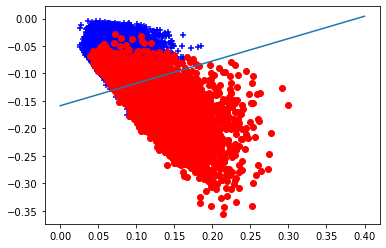

In [50]:
# plot training data with linear hypothesis from linear regression
x_plot = np.linspace(0, 0.4, 100)
y_plot = - w_poc[1]/w_poc[2]*x_plot - w_poc[0]/w_poc[2]

plt.figure()
plt.scatter(train_feature[:6742,1],train_feature[:6742,2],c='b',label='1',marker='+') 
plt.scatter(train_feature[6742:,1],train_feature[6742:,2],c='r',label='5',marker='o')
plt.plot(x_plot,y_plot,'-') 
plt.show()

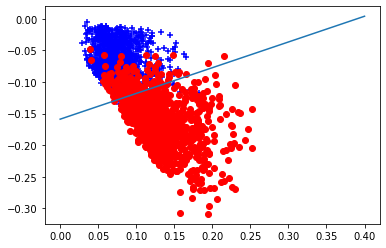

In [51]:
# plot test data with linear hypothesis from linear regression
x_plot = np.linspace(0, 0.4, 100)
y_plot = - w_poc[1]/w_poc[2]*x_plot - w_poc[0]/w_poc[2]

plt.figure()
plt.scatter(test_feature[:1135,1],test_feature[:1135,2],c='b',label='1',marker='+')
plt.scatter(test_feature[1135:,1],test_feature[1135:,2],c='r',label='5',marker='o')
plt.plot(x_plot,y_plot,'-') 
plt.show()

In [52]:
# This completes (a) & (b) for linear regression+pocket. 
# (c) Use the VC generalization bound (inequality 2.12 in LFD book) to obtain a bound on the true out-of-sample error based on E_in
# Growth function is bounded by N^(d_vc)+1. For linear model, d_vc=d+1, where d is number of features. Here d=2, N=12163.
# Substitute all these into the inequality 2.12. 
# For a bound based on E_test, use the Hoeffding bound (inequality 2.1 in LFD book). 
# Here M=1, N=2072 (test size). \delta=0.5 is the same for both cases.

In [53]:
# logistic regression

log_reg = LogisticRegression()
log_reg.fit(train_feature, train_Y)
w_log = lin_reg.coef_ # weights obtained from logistic regression

In [54]:
# compute ein
Ein = 0

for i in range(0,len(train_feature)):
    currentX = train_feature[i].reshape(-1,train_feature.shape[1])
    currentY = train_Y[i] 
    currentH = 1/(1+np.exp(-np.dot(currentX, w_log.T)))
    if currentH <= 0.5:
        current_predict = -1
    else:
        current_predict = +1
    if currentY != current_predict:
        Ein +=1
print('In-sample error with logistic regression:', Ein/12163)

#compute etest
Etest = 0

for i in range(0,len(test_feature)):
    currentX = test_feature[i].reshape(-1,test_feature.shape[1])
    currentY = test_Y[i] 
    currentH = 1/(1+np.exp(-np.dot(currentX, w_log.T)))
    if currentH <= 0.5:
        current_predict = -1
    else:
        current_predict = +1
    if currentY != current_predict:
        Etest +=1
print('Test error with linear regression+pocket:', Etest/(len(test_feature)))

In-sample error with logistic regression: 0.5543040368330182
Test error with linear regression+pocket: 0.5599407992106561


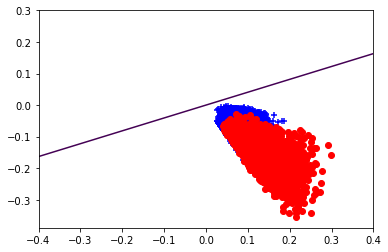

In [55]:
# plot training data with hypothesis from logistic regression
plt.figure()
x = np.linspace(-0.4,0.4,100)
y = np.linspace(-0.3,0.3,100)
x,y = np.meshgrid(x,y)
z = 1/(1+np.exp(-1*w_log[0] - x*w_log[1] - y*w_log[2]))
levels = np.array([0.5])
plt.scatter(train_feature[:6742,1],train_feature[:6742,2],c='b',label='1',marker='+')
plt.scatter(train_feature[6742:,1],train_feature[6742:,2],c='r',label='5',marker='o')
cs = plt.contour(x,y,z,levels)
plt.show()

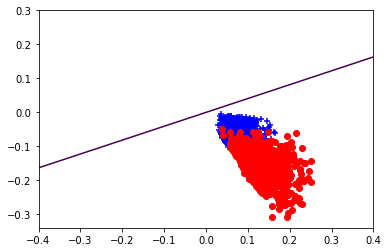

In [56]:
# plot test data with hypothesis from logistic regression
plt.figure()
x = np.linspace(-0.4,0.4,100)
y = np.linspace(-0.3,0.3,100)
x,y = np.meshgrid(x,y)
z = 1/(1+np.exp(-1*w_log[0] - x*w_log[1] - y*w_log[2]))
levels = np.array([0.5])
plt.scatter(test_feature[:1135,1],test_feature[:1135,2],c='b',label='1',marker='+')
plt.scatter(test_feature[1135:,1],test_feature[1135:,2],c='r',label='5',marker='o')
cs = plt.contour(x,y,z,levels)
plt.show()

In [57]:
# This completes (a) & (b) for logistic regression. 
# Do (c) for logistic regression in the same way as done for linear regression.

In [58]:
# linear regression with 3rd order polynomial feature transform
x1 = train_feature[:,1]
x2 = train_feature[:,2]
train_poly = np.column_stack((train_feature,x1**2,x1*x2,x2**2,x1**3,x1**2*x2,x1*x2**2,x2**3))
w_poly = np.matmul(np.matmul(np.linalg.inv(np.matmul(train_poly.T,train_poly)),train_poly.T),train_Y)

In [59]:
# compute ein
Ein = 0

for i in range(0,len(train_feature)):
    currentX = train_poly[i].reshape(-1,train_poly.shape[1])
    currentY = train_Y[i] 
    
    if currentY != np.sign(np.dot(currentX, w_poly.T)):
        Ein +=1
print('In-sample error for linear regression with 3rd order feature transform:', Ein/12163)

#compute etest
x1 = test_feature[:,1]
x2 = test_feature[:,2]
test_poly = np.column_stack((test_feature,x1**2,x1*x2,x2**2,x1**3,x1**2*x2,x1*x2**2,x2**3))
Etest = 0

for i in range(0,len(test_feature)):
    currentX = test_poly[i].reshape(-1,test_poly.shape[1])
    currentY = test_Y[i] 
    
    if currentY != np.sign(np.dot(currentX, w_poly.T)):
        Etest +=1
print('Test error for linear regression with 3rd order feature transform:', Etest/(len(test_feature)))

In-sample error for linear regression with 3rd order feature transform: 0.0944668256186796
Test error for linear regression with 3rd order feature transform: 0.08386778490379872


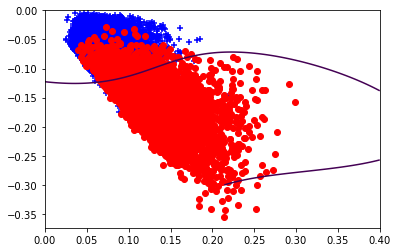

In [60]:
# plot training data with linear hypothesis from linear regression with 3rd order feature transform

plt.figure()
x = np.linspace(0,0.4,100)
y = np.linspace(-0.3,0,100)
x,y = np.meshgrid(x,y)
z = 1*w_poly[0] + x*w_poly[1] + y*w_poly[2] + x**2*w_poly[3] + x*y*w_poly[4] + y**2*w_poly[5] + x**3*w_poly[6] + x**2*y*w_poly[7] + x*y**2*w_poly[8] + y**3*w_poly[9]
levels = np.array([0])
plt.scatter(train_feature[:6742,1],train_feature[:6742,2],c='b',label='1',marker='+')
plt.scatter(train_feature[6742:,1],train_feature[6742:,2],c='r',label='5',marker='o')
cs = plt.contour(x,y,z,levels)
plt.show()

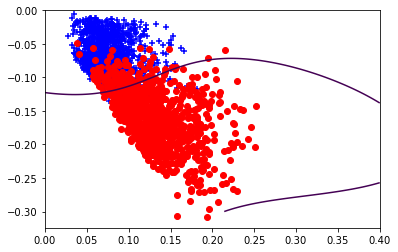

In [61]:
# plot test data with linear hypothesis from linear regression with 3rd order feature transform

plt.figure()
x = np.linspace(0,0.4,100)
y = np.linspace(-0.3,0,100)
x,y = np.meshgrid(x,y)
z = 1*w_poly[0] + x*w_poly[1] + y*w_poly[2] + x**2*w_poly[3] + x*y*w_poly[4] + y**2*w_poly[5] + x**3*w_poly[6] + x**2*y*w_poly[7] + x*y**2*w_poly[8] + y**3*w_poly[9]
levels = np.array([0])
plt.scatter(test_feature[:1135,1],test_feature[:1135,2],c='b',label='1',marker='+')
plt.scatter(test_feature[1135:,1],test_feature[1135:,2],c='r',label='5',marker='o')
cs = plt.contour(x,y,z,levels)
plt.show()

In [62]:
# This completes (a) & (b) for linear regression with 3rd order feature transform.
# Do (c) in the same way as before. But, now the number of features d=9. 

In [63]:
# (e) As final deliverable, report the model which has the least E_out. 
# In this case, the linear regression with 3rd order feature transform.